In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import os 
from data_viz import plot_confusion_matrix, save_classification_report_as_image, save_probability_histplot

## Select only data from sign up form

In [10]:
# Load your dataframe
dataset_name = "StrevonExport_final.csv"
data_dir = r"C:\Users\peter\Projects\HR_Forecasting\data"
df = pd.read_csv(os.path.join(data_dir, dataset_name))


# Remove stage, status, groupid
cols = [col for col in df.columns.to_list() if col not in ['stage','status','groupid']]
cols = [col for col in cols if "GroupTitle" not in col]
cols = [col for col in cols if "StageTitle" not in col]

df = df[cols]

In [11]:
df = df[df['uitkomstTelefonischContact_Intake']==1]

In [12]:
# fill missings 999
df = df.fillna(999)

# Prepare the data
# Replace 'target' with the name of your target column
X = df.drop(columns='starter')
y = df['starter']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Assuming your target variable has classes 'class_0', 'class_1', ..., you can replace these with your actual class names
class_names = ["dropout", "starter"]


## create model 

c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       178
           1       0.64      0.75      0.69        28

    accuracy                           0.91       206
   macro avg       0.80      0.84      0.82       206
weighted avg       0.92      0.91      0.91       206



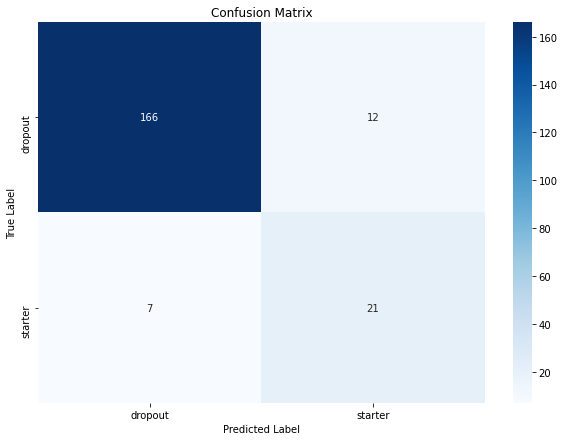

In [13]:
# Initialize and train the Balanced Random Forest model
brf = BalancedRandomForestClassifier(n_estimators=80, random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print('Classification Report:')
cr = classification_report(y_test, y_pred)
print(cr)


# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)

In [14]:
# Initialize the model
brf = BalancedRandomForestClassifier(n_estimators=100)

# Apply RFE
rfe = RFE(estimator=brf, n_features_to_select=10)  # Adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Transform the dataset with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the Balanced Random Forest with selected features
brf.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_rfe = brf.predict(X_test_rfe)
y_proba_rfe = brf.predict_proba(X_test_rfe)[:, 1]


c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter

Classification Report with RFE:
{'0': {'precision': 0.9666666666666667, 'recall': 0.9775280898876404, 'f1-score': 0.9720670391061451, 'support': 178.0}, '1': {'precision': 0.8461538461538461, 'recall': 0.7857142857142857, 'f1-score': 0.8148148148148148, 'support': 28.0}, 'accuracy': 0.9514563106796117, 'macro avg': {'precision': 0.9064102564102564, 'recall': 0.881621187800963, 'f1-score': 0.8934409269604799, 'support': 206.0}, 'weighted avg': {'precision': 0.950286283295992, 'recall': 0.9514563106796117, 'f1-score': 0.9506929503675177, 'support': 206.0}}


PermissionError: [Errno 13] Permission denied: 'C:\\model_2_classification_report.png'

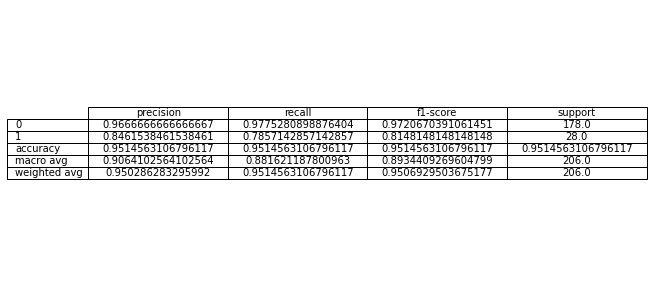

In [15]:
model_name = "model_2"
# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
cr = classification_report(y_test, y_pred_rfe, output_dict=True)
print(cr)

metrics_dir = r"C:\Users\peter\Projects\HR_Forecasting\models\model_metrics"
file_path = os.path.join(metrics_dir, f'{model_name}_classification_report.png')

save_classification_report_as_image(cr, filename=file_path, figsize=(10, 5), dpi=300)
cm_rfe = confusion_matrix(y_test, y_pred_rfe)

file_path = os.path.join(metrics_dir, f"{model_name}_confusion_matrix.png")
plot_confusion_matrix(cm_rfe, class_names, filename=file_path, dpi=300)

filepath = os.path.join(metrics_dir, f"{model_name}_probabilitie_histplot")
save_probability_histplot(y_proba_rfe, y_test, filepath, bins=20, figsize=(10, 6), dpi=300)

Classification Report with RFE:
              precision    recall  f1-score   support

           0       0.98      0.34      0.51       178
           1       0.19      0.96      0.31        28

    accuracy                           0.43       206
   macro avg       0.59      0.65      0.41       206
weighted avg       0.88      0.43      0.48       206



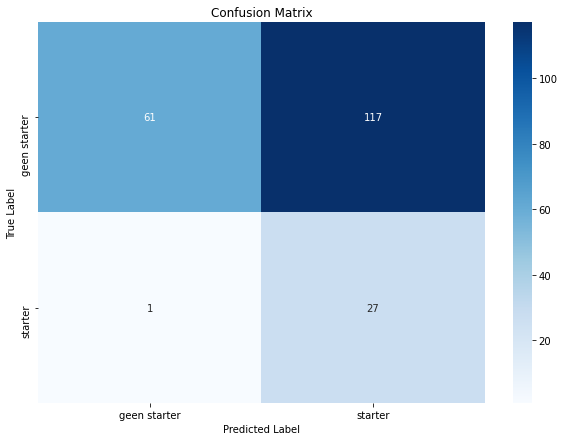

In [ ]:
threshold = 0.15
y_pred_custom = (y_proba_rfe >= threshold).astype(int)

# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
print(classification_report(y_test, y_pred_custom))

cm_rfe = confusion_matrix(y_test, y_pred_custom)
plot_confusion_matrix(cm_rfe, class_names)

In [ ]:
print(f"number of candidates: {len(df)}")
print(f"number of columns: {len(df.columns)}")

number of candidates: 1028
number of columns: 440


Classification Report with RFE:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       178
           1       0.79      0.79      0.79        28

    accuracy                           0.94       206
   macro avg       0.88      0.88      0.88       206
weighted avg       0.94      0.94      0.94       206



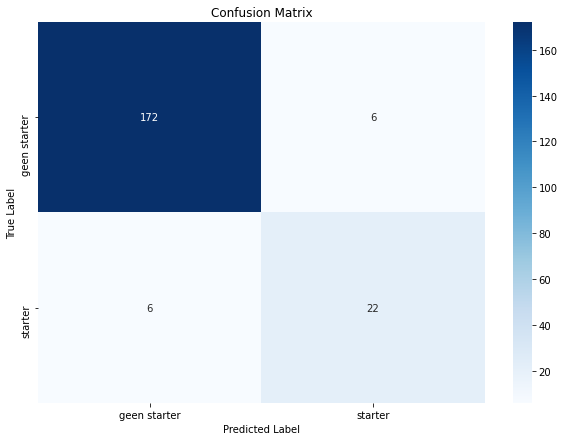

In [ ]:
# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
print(classification_report(y_test, y_pred_rfe))

class_names = ["geen starter", "starter"]

cm_rfe = confusion_matrix(y_test, y_pred_rfe)
plot_confusion_matrix(cm_rfe, class_names)

# # Calculate and print additional metrics
# roc_auc_rfe = roc_auc_score(y_test, y_proba_rfe)
# print(f'ROC-AUC with RFE: {roc_auc_rfe:.2f}')

In [ ]:
selected_features = X_train.columns[rfe.support_].tolist()
selected_features

['Unnamed: 0',
 'cdate',
 'belafspraak',
 'leeftijd',
 'geboortedatum',
 'Verloning marge stopper of W&S overname',
 'berekening',
 'jaar_ervaring',
 'diff_days',
 'Voorkeursbranche_installatietechniek']

In [ ]:
from datetime import datetime
meta_dict = {"model_type":"brf_rfe",
               "date_created":str(datetime.today().date()),
               "selected_features": selected_features,
               "all_columns": df.columns.to_list(),
               "data_selection": "post_TelefonischUitkomst_Intake",
                "dataset":dataset_name}
import json 
with open(r'C:\Users\peter\Projects\HR_Forecasting\models\model_2_meta.json', "w") as file:
    json.dump(meta_dict, file)

import pickle
with open(r'C:\Users\peter\Projects\HR_Forecasting\models\model_2.pkl', 'wb') as file:
    pickle.dump(brf, file)
